<a href="https://colab.research.google.com/github/Valepf/laboratorio_1/blob/main/Carpeta1/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Laboratorio 1 Big data ML**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


##**Preparacion de los dataset**

In [ ]:
ruta = '/content/drive/MyDrive/Dataset de ventas2'
archivos = os.listdir(ruta)
archivos

['Dataset_de_ventas_Abril.csv',
 'Dataset_de_ventas_Agosto.csv',
 'Dataset_de_ventas_Diciembre.csv',
 'Dataset_de_ventas_Enero.csv',
 'Dataset_de_ventas_Febrero.csv',
 'Dataset_de_ventas_Julio.csv',
 'Dataset_de_ventas_Junio.csv',
 'Dataset_de_ventas_Marzo.csv',
 'Dataset_de_ventas_Mayo.csv',
 'Dataset_de_ventas_Noviembre.csv',
 'Dataset_de_ventas_Octubre.csv',
 'Dataset_de_ventas_Septiembre.csv',
 '.ipynb_checkpoints']

In [ ]:
# creamos un diccionario para guardar estos archivos, para luego hacer un df

dataframes = {}

for archivo in archivos:
  if archivo.endswith('csv'):
    mes = archivo.split('_')[3].split('.')[0] # obtener el nombre del mes solo
    #aca obtenemos la ruta completa de donde se encuentra el csv de cada mes
    path_completo = os.path.join(ruta, archivo) # obtener ruta de acceso completa
    df = pd.read_csv(path_completo)   #cargar el archivo csv en un df
    #vamos a trabajar sobre la copia del df original
    df_ventas = df.copy()

    # LIMPIO CADA DF ANTES DE CARGARLO
    df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors = 'coerce') #errors = coerce transfora lo
    df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors = 'coerce')
    #esta es una mascara que me genera un true si hay un nan, y sino hay nan me pone un false
    df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
    df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]
    #aca elimino los nan's
    df_ventas = df_ventas.dropna()
    #aca voy a pasar todos los datos al tipo numerico q corresponda
    df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int) #esta funcion me transforma todos los valores a numericos a int
    df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float) #esta funcion me transforma todos los valores a numericos a float
    # FINALIZA

    #a cada mes le cargo su dataset correspondiente, por eso uso la variable mes
    dataframes[mes] = df_ventas

dataframes['Septiembre']

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
def extraer_datos(df_ventas):
    # Convierte la columna 'Fecha de Pedido' en tipo datetime
    df_ventas['Fecha de Pedido'] = pd.to_datetime(df_ventas['Fecha de Pedido'])

    # Extrae la hora y el día de la columna 'Fecha de Pedido'
    df_ventas['Hora'] = df_ventas['Fecha de Pedido'].dt.hour
    df_ventas['Dia'] = df_ventas['Fecha de Pedido'].dt.day

    return df_ventas

# Llamar a la función y asignar el resultado a dataframe_mes
dataframe_mes = extraer_datos(dataframe_mes)

In [ ]:
# Ordenar los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

totales_ventas = []
nombres_meses = []

for mes in meses:
  dataframe_mes = dataframes[mes]
  dataframes_mes = extraer_datos(dataframe_mes)

  #aca sumo el total de ventas de cada mes
  total_ventas_mes = dataframe_mes['Cantidad Pedida'].sum() #aca obtengo el total de ventas de cada df(x mes)
  totales_ventas.append(total_ventas_mes)                   #append al array de la suma de total de ventas x cada mes(creo un array con las ventas de cada mes)
  #agregamos el nombre de cada mes, al array que contiene el nombre de todos los meses
  nombres_meses.append(mes)

##**1. Comportamiento de las ventas en los distintos meses**


In [ ]:
# Creo la figura
fig = go.Figure()

fig.add_trace(go.Bar(
    x=nombres_meses,
    y=totales_ventas,
    yaxis="y",
    name="Unidades vendidas",
    marker =dict(color=totales_ventas,colorscale= 'RdYlGn', colorbar= dict(title= "Total de ventas")),
    text = totales_ventas,
    textposition = 'auto'))

fig.update_layout(
    title="Unidades vendidas por mes",
    xaxis=dict(title="Meses"),
    yaxis=dict(title="Unidades vendidas", side = "left"))

fig.show()

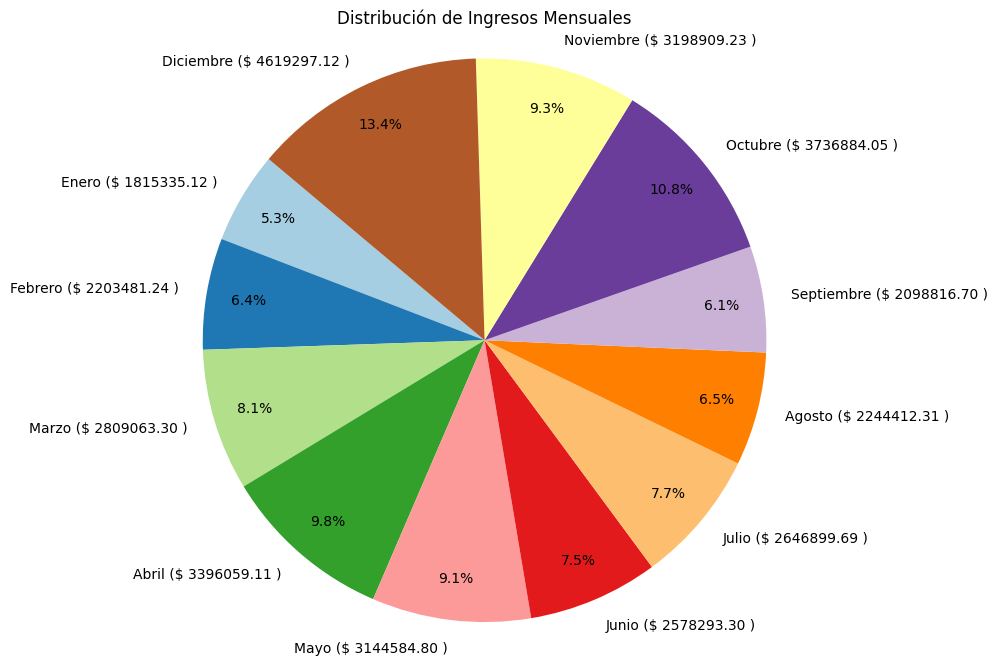

In [ ]:
# Crear un diccionario para almacenar los DataFrames de cada mes
dataframes = {}

# Iterar sobre los archivos y cargar los DataFrames de cada mes
for archivo in archivos:
    if archivo.endswith('csv'):
        mes = archivo.split('_')[3].split('.')[0]
        path_completo = os.path.join(ruta, archivo)
        df = pd.read_csv(path_completo)
        df_ventas = df.copy()

        # Limpieza de los DataFrames
        df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')
        df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')
        df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
        df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]
        df_ventas = df_ventas.dropna()
        df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
        df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float)

        # Almacenar el DataFrame limpio en el diccionario
        dataframes[mes] = df_ventas

# Crear una lista para almacenar los totales de ingresos mensuales
totales_ventas = []

# Obtener los totales de ventas mensuales
for mes in meses:
    dataframe_mes = dataframes[mes]
    total_ventas_mes = (dataframe_mes['Cantidad Pedida'] * dataframe_mes['Precio Unitario']).sum()
    totales_ventas.append(total_ventas_mes)

# Crear un gráfico de torta con etiquetas de mes y valores en moneda
plt.figure(figsize=(8, 8))
plt.pie(totales_ventas, labels=[f'{mes} ($ {total:.2f} )' for mes, total in zip(meses, totales_ventas)], startangle=140, autopct='%1.1f%%', pctdistance=0.85, colors=plt.cm.Paired(range(len(meses))))
plt.title('Distribución de Ingresos Mensuales')
plt.axis('equal')  # Aspecto igual para que la torta sea un círculo

# Mostrar el gráfico de torta
plt.show()


In [ ]:
# Función para extraer datos de día y hora de los pedidos
def extraer_datos(datos):
    datos['Fecha de Pedido'] = pd.to_datetime(datos['Fecha de Pedido'])
    datos['Hora'] = datos['Fecha de Pedido'].dt.hour
    datos['Dia'] = datos['Fecha de Pedido'].dt.day
    return datos

# Lista de meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Listas para almacenar los totales de ventas y nombres de los meses
totales_ventas = []
nombres_meses = []

# Iterar a través de los meses
for mes in meses:
    # Obtener el DataFrame correspondiente al mes
    dataframe_mes = dataframes[mes]

    # Aplicar la función para extraer datos de día y hora
    dataframe_mes = extraer_datos(dataframe_mes)

    # Calcular el total de ventas de cada mes y agregarlo a la lista
    total_ventas_mes = dataframe_mes['Cantidad Pedida'].sum()
    totales_ventas.append(total_ventas_mes)

    # Agregar el nombre del mes a la lista de nombres de meses
    nombres_meses.append(mes)


##**2. Optimización de la publicidad y patrón de ventas por hora**


In [ ]:
# Creo el objeto figura
Horas = list(range(24))
fig = go.Figure()

for mes in meses:
  dataframe_mes = dataframes[mes]
  dataframes_mes = extraer_datos(dataframe_mes)

  Ventas_por_hora= dataframe_mes.groupby('Hora')['Cantidad Pedida'].count()

# Agrego al objeto figura un grafico de de linea con las horas y las ventas por hora
  fig.add_trace(go.Scatter(
      x=Horas,
      y=Ventas_por_hora,
      mode='lines',
      name=mes,
      line=dict(shape='spline', smoothing=1.3, width=2)))

# Configuro los ejes y los títulos
fig.update_layout(

    title="Unidades vendidas por hora",
    xaxis=dict(title="Hora", tickvals=Horas),  # Para que en el eje x se muestren todos los valores uso tickvals=Horas
    yaxis=dict(title="Unidades vendidas", side="left"))

fig.show()

In [ ]:
# Lista de meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear el objeto figura
fig = go.Figure()

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframes_mes = extraer_datos(dataframe_mes)

    Ventas_por_hora = dataframe_mes.groupby('Hora')['Cantidad Pedida'].count()

    # Agregar al objeto figura un gráfico de línea con las horas y las ventas por hora
    fig.add_trace(go.Scatter(
        x=list(range(24)),
        y=Ventas_por_hora,
        mode='lines',
        name=mes,
        line=dict(shape='spline', smoothing=1.3, width=2)))

# Destacar la franja horaria de 15 a 16
fig.add_vrect(x0=15, x1=16, fillcolor="rgba(0, 0, 255, 0.3)", layer="below", name="Momento ideal para publicidad o promoción")

# Configurar los ejes y los títulos
fig.update_layout(
    title="Unidades vendidas por hora para todos los meses",
    xaxis=dict(title="Hora", tickvals=list(range(24))),
    yaxis=dict(title="Unidades vendidas", side="left"))

# Agregar la leyenda
fig.update_layout(legend=dict(x=0.75, y=1.1))

fig.show()


In [ ]:
# Lista de meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear el objeto figura
fig = go.Figure()

# Definir una paleta de colores para los meses
colores_meses = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta', 'lime']

for i, mes in enumerate(meses):
    dataframe_mes = dataframes[mes]
    dataframes_mes = extraer_datos(dataframe_mes)

    Ventas_por_hora = dataframe_mes.groupby('Hora')['Cantidad Pedida'].count()

    # Encontrar la hora con el pico de ventas
    hora_pico_ventas = Ventas_por_hora.idxmax()
    ventas_pico = Ventas_por_hora.max()

    # Agregar al objeto figura un gráfico de línea con las horas y las ventas por hora
    fig.add_trace(go.Scatter(
        x=list(range(24)),
        y=Ventas_por_hora,
        mode='lines',
        name=mes,
        line=dict(color=colores_meses[i], width=2),
        legendgroup=mes  # Para agrupar las leyendas por mes
    ))

    # Marcar la hora con un punto
    fig.add_trace(go.Scatter(
        x=[hora_pico_ventas],
        y=[ventas_pico],
        mode='markers',
        name=f'{mes} (Máximo de Ventas)',
        marker=dict(color=colores_meses[i], size=8),
        legendgroup=mes
    ))

    # Agregar líneas verticales punteadas en la hora de máximo de ventas
    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=hora_pico_ventas,
            x1=hora_pico_ventas,
            y0=0,
            y1=ventas_pico,
            line=dict(color=colores_meses[i], width=1, dash='dash')
        )
    )

    # Agregar líneas verticales punteadas en las horas 12 y 14
    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=12,
            x1=12,
            y0=0,
            y1=ventas_pico,  # Puedes ajustar la altura de la línea si lo deseas
            line=dict(color='black', width=1, dash='dash')
        )
    )

    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=14,
            x1=14,
            y0=0,
            y1=ventas_pico,  # Puedes ajustar la altura de la línea si lo deseas
            line=dict(color='gray', width=1, dash='dash')
        )
    )

# Configurar los ejes y los títulos
fig.update_layout(
    title="Patrones de Ventas por Hora a lo largo del Año",
    xaxis=dict(title="Hora", tickvals=list(range(24))),
    yaxis=dict(title="Unidades Vendidas", side="left"))

# Agregar la leyenda
fig.update_layout(legend=dict(x=0.75, y=1.1))

# Mostrar la figura
fig.show()


##**3. Distribución de ventas por ubicación:**


In [ ]:
#Creo el array de meses para recorrer el df
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#Creo las dos listas vacias que seran los ejes del grafico
cantidad_pedidos = []
nombres_meses = []

# para cada mes
for mes in meses:
    #Extraigo los datos del mes
    dataframe_mes = dataframes[mes]

    # Creamos la columna "Ciudad", filtrando la direccion de envio (split("-")(2).split(" ").(0))
    dataframe_mes['Ciudad'] = dataframe_mes['Dirección de Envio'].str.extract(r',\s(.*?),\s')

    # Una vez extraidos los estados, se suman las cantidades pedidas, agrupadas
    # por estado
    ciudad_mas_pedidos = dataframe_mes.groupby('Ciudad')['Cantidad Pedida'].sum()

    # Ordeno las ciudades de mayor a menor ventas
    ciudad_mas_pedidos = ciudad_mas_pedidos.sort_values(ascending=False)

    # Tomo el top 1 (valor máximo)
    Ciudad_maximo_ventas = ciudad_mas_pedidos.index[0]  # Etiqueta del máximo valor
    cantidad_maxima_ventas = ciudad_mas_pedidos.iloc[0]  # Valor máximo

    # Lo agrago a las listas para gráficar
    nombres_meses.append(f"{mes}-{Ciudad_maximo_ventas}")
    cantidad_pedidos.append(cantidad_maxima_ventas)






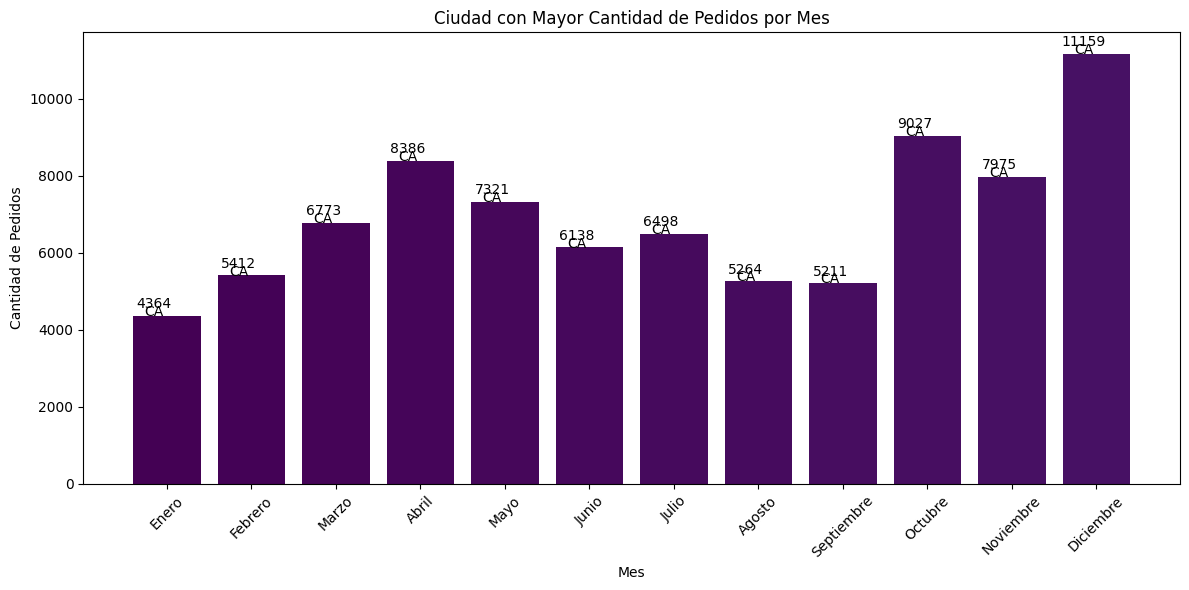

In [ ]:
# Crear un DataFrame con los datos de cantidad_pedidos y nombres_meses
df = pd.DataFrame({'Mes-Ciudad': nombres_meses, 'Cantidad de Pedidos': cantidad_pedidos})

# Dividir la columna 'Mes-Ciudad' en dos columnas separadas 'Mes' y 'Ciudad'
df[['Mes', 'Ciudad']] = df['Mes-Ciudad'].str.split('-', expand=True)

# Eliminar la columna 'Mes-Ciudad' si no es necesaria
df.drop(columns=['Mes-Ciudad'], inplace=True)

# Ordenar el DataFrame por el mes
df['Mes'] = pd.Categorical(df['Mes'], categories=meses, ordered=True)
df = df.sort_values('Mes')

colores = plt.cm.viridis(range(len(df)))
#  gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df['Mes'], df['Cantidad de Pedidos'], color=colores)  # Usar la paleta de colores personalizada
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pedidos')
plt.title('Ciudad con Mayor Cantidad de Pedidos por Mes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Agregar etiquetas de ciudad y cantidad arriba de cada barra
for bar, ciudad, cantidad in zip(bars, df['Ciudad'], df['Cantidad de Pedidos']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 100, ciudad, ha='center', fontsize=10, va='center')
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 300, str(cantidad), ha='center', fontsize=10, va='center')

plt.tight_layout()
plt.show()





In [ ]:
#Creo el array de meses para recorrer el df
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#Creo las dos listas vacias que seran los ejes del grafico
cantidad_pedidos = []
nombres_meses = []

# para cada mes
for mes in meses:
    #Extraigo los datos del mes
    dataframe_mes = dataframes[mes]

    # Creamos la columna "Estado", filtrando la direccion de envio (split("-")(2).split(" ").(0))
    dataframe_mes['Estado'] = dataframe_mes['Dirección de Envio'].str.extract(r'(\b[A-Z]{2}\b)')

    # Una vez extraidos los estados, se suman las cantidades pedidas, agrupadas
    # por estado
    estado_mas_pedidos = dataframe_mes.groupby('Estado')['Cantidad Pedida'].sum()
    estado_mas_pedidos = estado_mas_pedidos.sort_values(ascending=False)

    # Saco el top 1 (valor maximo)
    estado_maximo_ventas = estado_mas_pedidos.index[0] #Etiqueta del maximo valor
    cantidad_maxima_ventas = estado_mas_pedidos.iloc[0]

    # Lo agrago a las listas para graficar
    nombres_meses.append(f"{mes}-{estado_maximo_ventas}")
    cantidad_pedidos.append(cantidad_maxima_ventas)



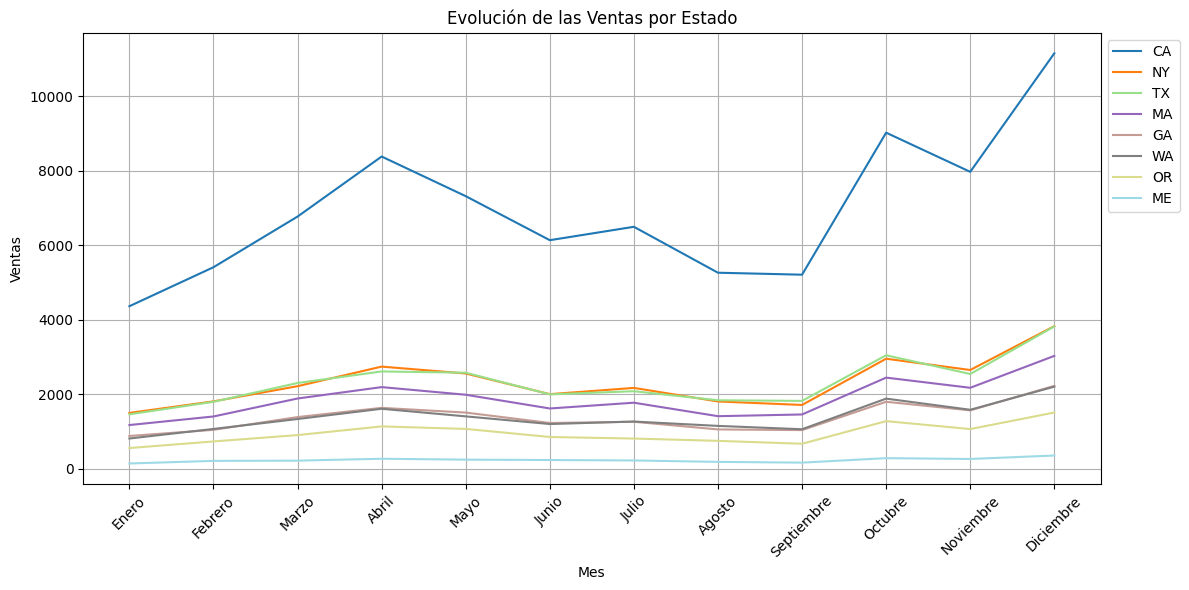

In [ ]:
# Crear un diccionario para almacenar los datos de ventas por estado mes a mes
datos_ventas = {}

# Inicializar el diccionario con los estados como claves y asignar colores
estados = estado_mas_pedidos.index
colores = plt.cm.tab20(np.linspace(0, 1, len(estados)))

for i, estado in enumerate(estados):
    datos_ventas[estado] = []
    datos_ventas[estado].append(colores[i])

# Iterar a través de los meses
for mes in meses:
    # Extraer datos del mes y agrupar por estado
    dataframe_mes = dataframes[mes]
    dataframe_mes['Estado'] = dataframe_mes['Dirección de Envio'].str.extract(r'(\b[A-Z]{2}\b)')
    estado_mas_pedidos = dataframe_mes.groupby('Estado')['Cantidad Pedida'].sum()

    # Agregar datos de ventas por estado a la lista correspondiente
    for estado in datos_ventas.keys():
        if estado in estado_mas_pedidos:
            datos_ventas[estado].append(estado_mas_pedidos[estado])
        else:
            datos_ventas[estado].append(0)

# Crear un gráfico de líneas con colores diferentes para cada estado
plt.figure(figsize=(12, 6))

for estado, datos in datos_ventas.items():
    color = datos[0]  # Obtener el color asignado
    ventas = datos[1:]  # Obtener los datos de ventas
    plt.plot(meses, ventas, label=estado, color=color)

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Evolución de las Ventas por Estado')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



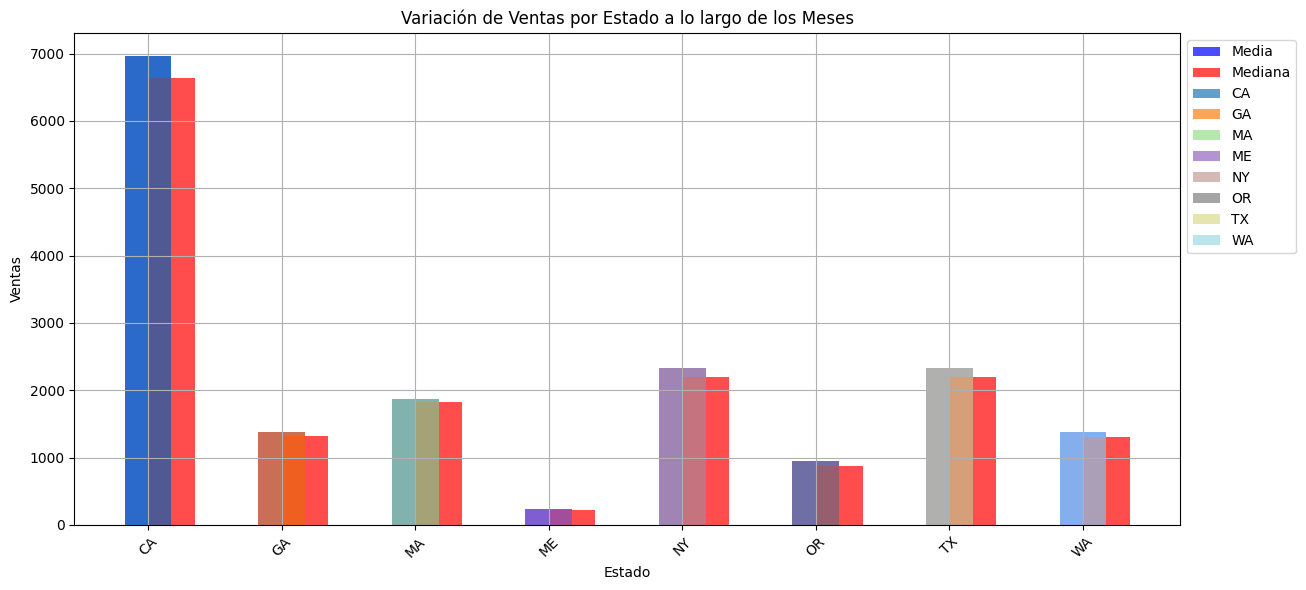

In [ ]:
# Crear un diccionario para almacenar los datos de ventas por estado mes a mes
datos_ventas = {}

# Inicializar el diccionario con los estados como claves
estados = estado_mas_pedidos.index

for estado in estados:
    datos_ventas[estado] = []

# Iterar a través de los meses
for mes in meses:
    # Extraer datos del mes y agrupar por estado
    dataframe_mes = dataframes[mes]
    dataframe_mes['Estado'] = dataframe_mes['Dirección de Envio'].str.extract(r'(\b[A-Z]{2}\b)')
    estado_mas_pedidos = dataframe_mes.groupby('Estado')['Cantidad Pedida'].sum()

    # Agregar datos de ventas por estado a la lista correspondiente
    for estado in estados:
        if estado in estado_mas_pedidos:
            datos_ventas[estado].append(estado_mas_pedidos[estado])
        else:
            datos_ventas[estado].append(0)

# Calcular la media y la mediana de las ventas por estado
medias = [np.mean(datos_ventas[estado]) for estado in estados]
medianas = [np.median(datos_ventas[estado]) for estado in estados]

# Colores para los estados, medias y medianas
colores_estados = plt.cm.tab20(np.linspace(0, 1, len(estados)))
color_medias = 'blue'
color_medianas = 'red'

# Crear un gráfico de barras para visualizar las estadísticas
plt.figure(figsize=(12, 6))
x = np.arange(len(estados))
ancho_barra = 0.35

plt.bar(x, medias, ancho_barra, label='Media', color=color_medias, align='center', alpha=0.7)
plt.bar(x, medianas, ancho_barra, label='Mediana', color=color_medianas, align='edge', alpha=0.7)

# Asignar colores diferentes a cada estado
for i, estado in enumerate(estados):
    plt.bar(x[i], medias[i], ancho_barra, color=colores_estados[i], label=estado, align='center', alpha=0.7)

plt.xlabel('Estado')
plt.ylabel('Ventas')
plt.title('Variación de Ventas por Estado a lo largo de los Meses')
plt.xticks(x, estados, rotation=45)
plt.grid(True)
plt.tight_layout()

# Crear una leyenda fuera del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico de barras
plt.show()




##**4. Análisis del producto más vendido**


In [ ]:
# Creo el array de meses para recorrer el DataFrame
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Creo la lista para almacenar los productos más vendidos de cada mes
productos_mes_a_mes = []

# Para cada mes
for mes in meses:
    # Extraigo los datos del mes
    dataframe_mes = dataframes[mes]

    # Sumo los productos y la cantidad pedida para obtener el total de productos vendidos
    productos_vendidos = dataframe_mes.groupby('Producto')['Cantidad Pedida'].sum()

    # Obtengo el producto más vendido del mes
    producto_mas_vendido = productos_vendidos.idxmax()  # Etiqueta del producto más vendido
    cantidad_maxima_ventas = productos_vendidos.max()

    # Agrego los resultados a la lista
    productos_mes_a_mes.append([mes, producto_mas_vendido, cantidad_maxima_ventas])

# Imprimir los resultados
for mes, producto, cantidad in productos_mes_a_mes:
    print(f"Mes: {mes}, Producto más vendido: {producto}, Cantidad: {cantidad}")


Mes: Enero, Producto más vendido: AAA Batteries (4-pack), Cantidad: 1596
Mes: Febrero, Producto más vendido: AAA Batteries (4-pack), Cantidad: 1975
Mes: Marzo, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2478
Mes: Abril, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2936
Mes: Mayo, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2931
Mes: Junio, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2160
Mes: Julio, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2366
Mes: Agosto, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2019
Mes: Septiembre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 1927
Mes: Octubre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 3362
Mes: Noviembre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 3027
Mes: Diciembre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 4240


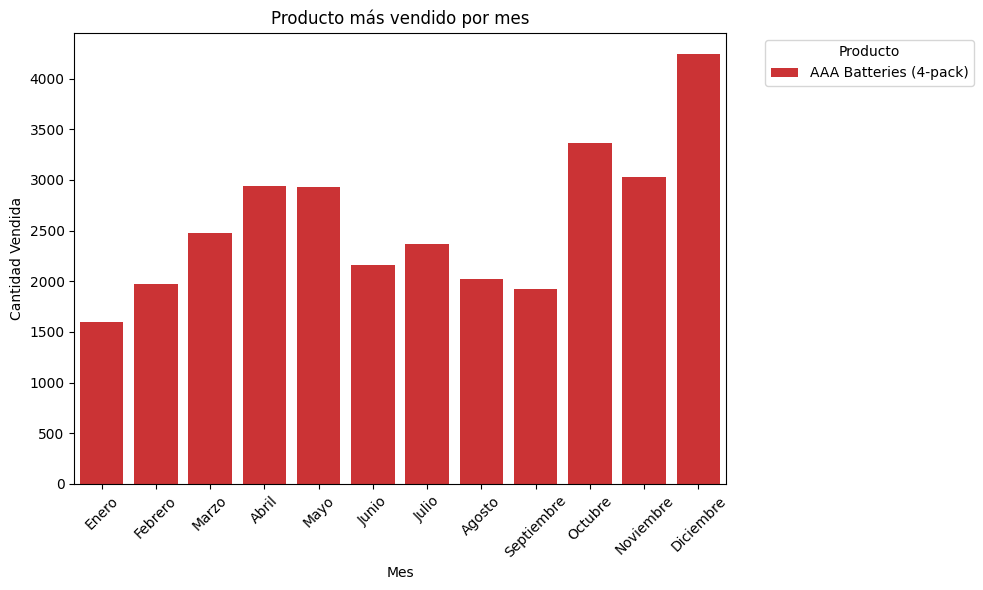

In [ ]:
# Crear un DataFrame a partir de la lista productos_mes_a_mes
df_productos_mes = pd.DataFrame(productos_mes_a_mes, columns=['Mes', 'Producto', 'Cantidad'])

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Cantidad', hue='Producto', data=df_productos_mes, palette='Set1')

# Personalizar el gráfico
plt.title('Producto más vendido por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)

# Ajustar la leyenda
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


##**5. Tendencia ventas**


In [ ]:
ventas_por_dia_mes_total = pd.DataFrame()

for mes in meses:

    dataframe_mes = dataframes[mes]

    # Convierto la columna 'Fecha de Pedido' a tipo datetime
    dataframe_mes['Fecha de Pedido'] = pd.to_datetime(dataframe_mes['Fecha de Pedido'])

    # Agrego las columnas 'Dia' y 'Mes'
    dataframe_mes['Dia'] = dataframe_mes['Fecha de Pedido'].dt.day
    dataframe_mes['Mes'] = dataframe_mes['Fecha de Pedido'].dt.month

    # Agrupo y sumo las ventas por día y mes
    ventas_por_dia_mes = dataframe_mes.groupby(['Dia', 'Mes'])['Cantidad Pedida'].sum().reset_index()

    # Agrego los resultados al DataFrame total
    ventas_por_dia_mes_total = pd.concat([ventas_por_dia_mes_total, ventas_por_dia_mes])

print(ventas_por_dia_mes_total)


    Dia  Mes  Cantidad Pedida
0     1    1              343
1     1    2                6
2     2    1              368
3     3    1              330
4     4    1              330
..  ...  ...              ...
27   27   12              869
28   28   12              931
29   29   12              954
30   30   12              928
31   31   12              886

[377 rows x 3 columns]


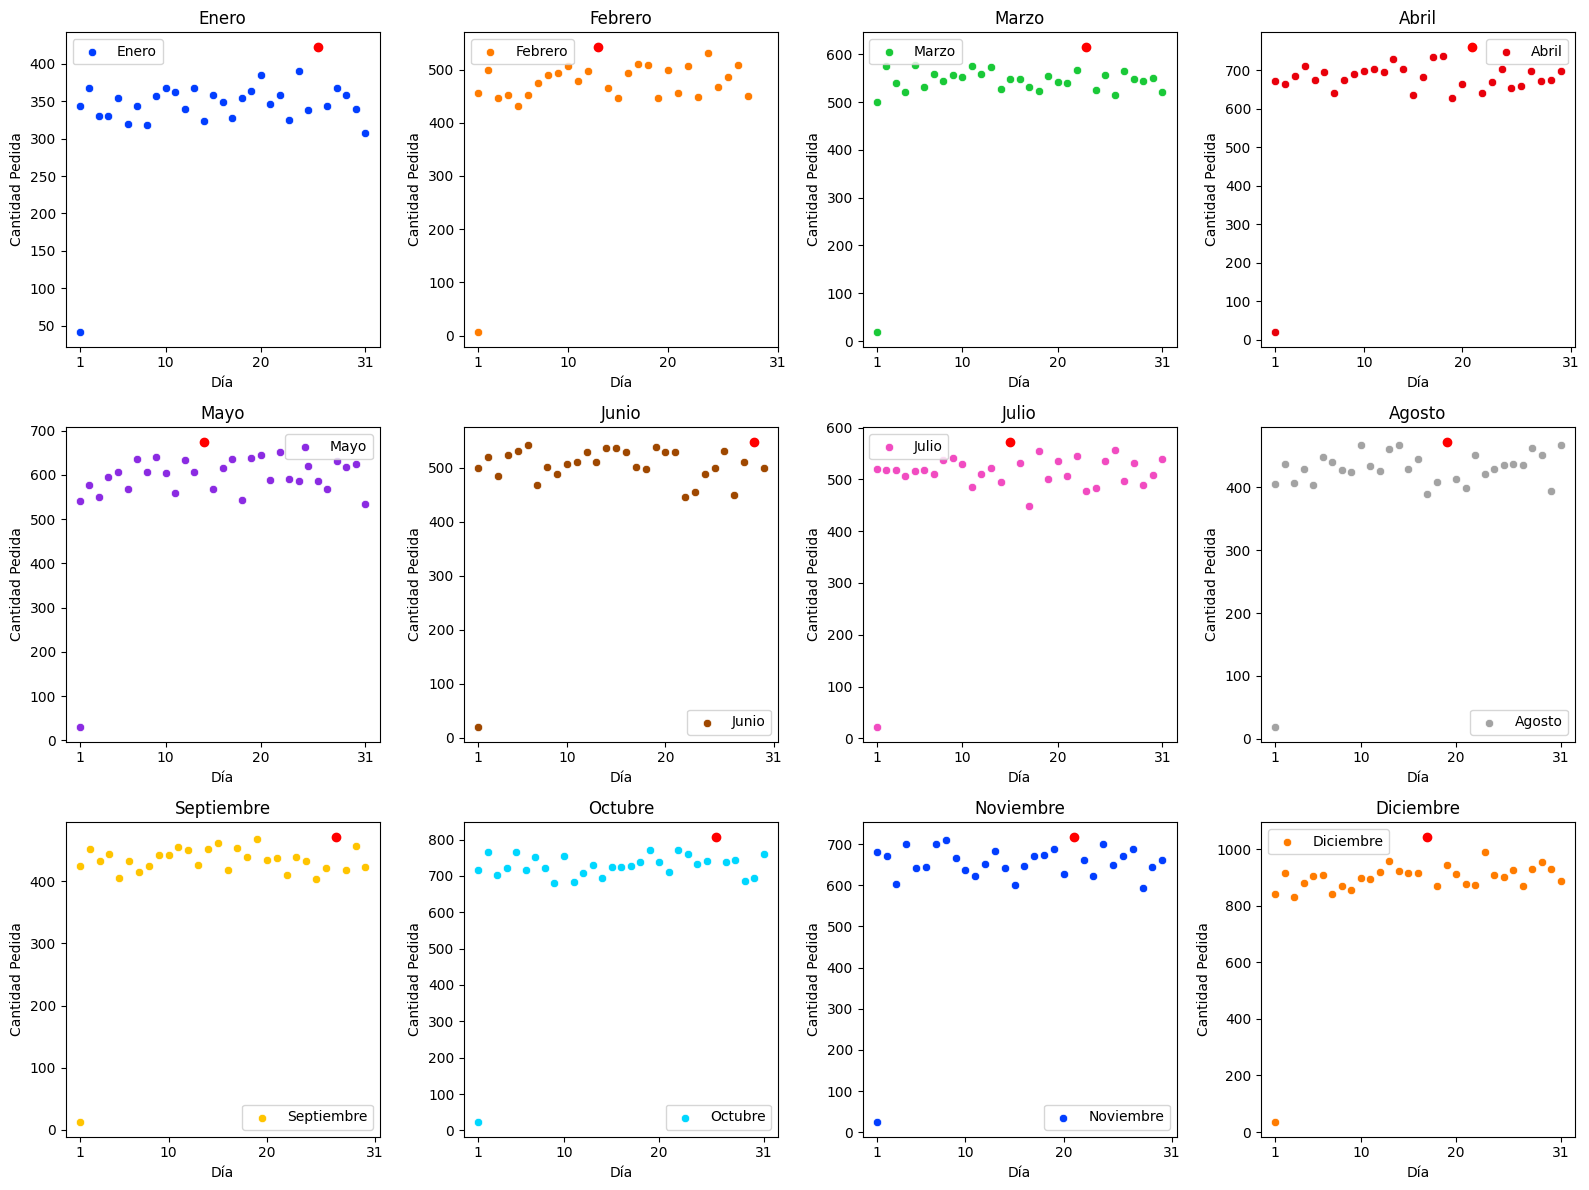

In [ ]:
# Crear un gráfico de barras para mostrar las ventas por día y mes con colores variados
plt.figure(figsize=(16, 12))  # Aumenta el tamaño de la figura

# Paleta de colores para los meses (usando una paleta diferente, como "bright")
colores_meses = sns.color_palette("bright", len(meses))

# Días deseados para mostrar en el eje x
dias_deseados = [1, 10, 20, 31]

# Iterar a través de los meses y crear subplots
for i, mes in enumerate(meses, start=1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas para 12 meses
    data_mes = ventas_por_dia_mes_total[ventas_por_dia_mes_total['Mes'] == i]

    ax = sns.scatterplot(x='Dia', y='Cantidad Pedida', data=data_mes, color=colores_meses[i-1], label=mes)
    plt.title(mes)
    plt.xlabel('Día')
    plt.ylabel('Cantidad Pedida')

    # Encontrar el día con más ventas en este mes
    dia_mas_ventas = data_mes.loc[data_mes['Cantidad Pedida'].idxmax()]['Dia']

    # Marcar el día con más ventas con un punto rojo y agregar una etiqueta
    max_ventas = data_mes['Cantidad Pedida'].max()
    plt.scatter(x=dia_mas_ventas, y=max_ventas, color='red', label=f'Día {dia_mas_ventas} (Máximo)', zorder=5)

    # Configurar los días en el eje x
    ax.set_xticks(dias_deseados)  # Configura los ticks para los días deseados
    ax.set_xticklabels(dias_deseados)  # Configura las etiquetas de los días deseados

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Crear un DataFrame para analizar la variación de ventas por día de la semana
ventas_por_dia_semana = ventas_por_dia_mes_total.copy()

# Crear una columna que indique el día de la semana
ventas_por_dia_semana['Dia de la Semana'] = dataframe_mes['Fecha de Pedido'].dt.day_name()

# Calcular la suma de ventas por día de la semana
ventas_por_dia_semana = ventas_por_dia_semana.groupby('Dia de la Semana')['Cantidad Pedida'].sum().reset_index()

# Ordenar los días de la semana de manera personalizada
orden_dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana['Dia de la Semana'] = pd.Categorical(ventas_por_dia_semana['Dia de la Semana'], categories=orden_dias_semana, ordered=True)

# Renombrar columnas
ventas_por_dia_semana = ventas_por_dia_semana.rename(columns={'Dia de la Semana': 'Día de la Semana', 'Cantidad Pedida': 'Ventas'})

# Mostrar el DataFrame resultante
print(ventas_por_dia_semana)



  Día de la Semana  Ventas
0           Friday   27779
1           Monday   30385
2         Saturday   19916
3           Sunday   34662
4         Thursday    6962
5          Tuesday   27364
6        Wednesday   62011


In [ ]:
fig = px.pie(ventas_por_dia_semana,
             names='Día de la Semana',
             values='Ventas',
             title='Distribución de Ventas por Día de la Semana')

fig.show()

In [ ]:
# Crear una columna que indique si el día es laborable o fin de semana
ventas_por_dia_semana['Tipo de Día'] = ventas_por_dia_semana['Día de la Semana'].apply(
    lambda x: 'Laborable' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Fin de Semana')

# Calcular el promedio de ventas para días laborables y fines de semana
ventas_promedio = ventas_por_dia_semana.groupby('Tipo de Día')['Ventas'].mean().reset_index()

# Mostrar el promedio de ventas
print(ventas_promedio)








     Tipo de Día   Ventas
0  Fin de Semana  27289.0
1      Laborable  30900.2


In [ ]:
# Crear un gráfico de barras con Plotly Express
fig = px.bar(ventas_promedio, x='Tipo de Día', y='Ventas',
             title='Promedio de Ventas por Tipo de Día',
             labels={'Tipo de Día': 'Día de la Semana', 'Ventas': 'Promedio de Ventas'})

colores_barras = ['blue', 'green']
fig.update_traces(marker=dict(color=colores_barras))

valor_linea = ventas_promedio['Ventas'].mean()  # Valor medio de las ventas
fig.add_hline(y=valor_linea, line_dash="dash", line_color="black", annotation_text=f'Media: {valor_linea:.2f}', annotation_position="bottom right")

# Mostrar el gráfico
fig.show()


#**6.Impacto de eventos especiales en las ventas**

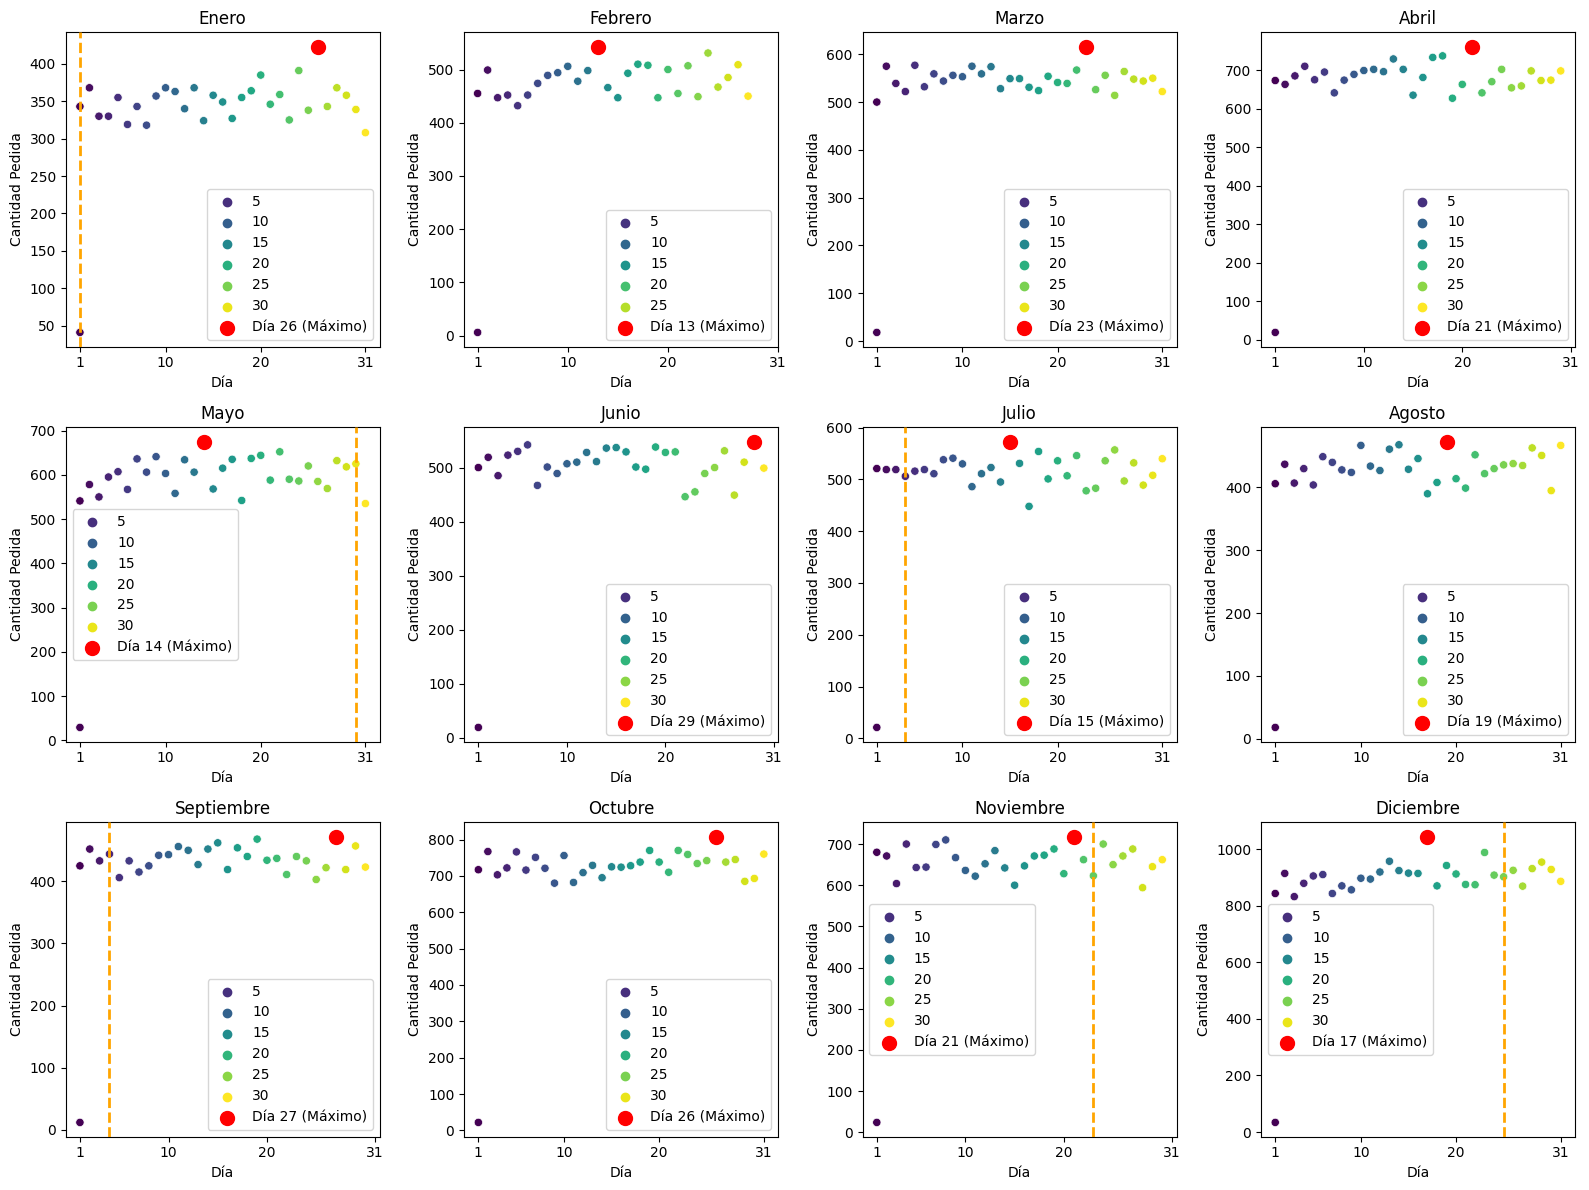

In [ ]:
# Ejemplo de fechas de días festivos en Estados Unidos como una lista de cadenas de texto en formato 'yyyy-mm-dd'
dias_festivos_usa = ['2023-01-01','2023-05-30', '2023-07-04','2023-09-04','2023-11-23', '2023-12-25']


# Convierte las fechas en cadenas de texto a objetos Timestamp
dias_festivos_usa = pd.to_datetime(dias_festivos_usa)

# Crear un gráfico scatterplot para mostrar las ventas por día y mes con colores variados
plt.figure(figsize=(16, 12))  # Aumenta el tamaño de la figura

# Paleta de colores para los meses
colores_meses = sns.color_palette("Set3", len(meses))

# Iterar a través de los meses y crear subplots
for i, mes in enumerate(meses, start=1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas para 12 meses
    data_mes = ventas_por_dia_mes_total[ventas_por_dia_mes_total['Mes'] == i]

    # Usar un scatterplot en lugar de un barplot
    ax = sns.scatterplot(x='Dia', y='Cantidad Pedida', data=data_mes, hue='Dia', palette='viridis')

    plt.title(mes)
    plt.xlabel('Día')
    plt.ylabel('Cantidad Pedida')

    # Encontrar el día con más ventas en este mes
    dia_mas_ventas = data_mes.loc[data_mes['Cantidad Pedida'].idxmax()]['Dia']

    # Marcar el día con más ventas con un punto rojo y agregar una etiqueta
    max_ventas = data_mes['Cantidad Pedida'].max()
    plt.scatter(x=dia_mas_ventas, y=max_ventas, color='red', label=f'Día {dia_mas_ventas} (Máximo)', zorder=5, marker='o', s=100)


    # Configurar los días en el eje x
    ax.set_xticks(dias_deseados)  # Configura los ticks para los días deseados
    ax.set_xticklabels(dias_deseados)  # Configura las etiquetas de los días deseados

    # Agregar una leyenda
    plt.legend()

    # Resaltar los días festivos en el gráfico
    for dia_festivo in dias_festivos_usa:
        if dia_festivo.month == i:  # Compara el mes del día festivo con el mes actual
            dia = dia_festivo.day
            plt.axvline(x=dia, color='orange', linestyle='--', linewidth=2, label='Día Festivo', zorder=4)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
